In [332]:
import numpy as np
import matplotlib.pyplot as plt

In [333]:
noise = 50

In [361]:
def np_to_img(np_img):
    np.clip(np_img, 0, 255)
    plt.figure(figsize=(7,7))
    plt.imshow(np_img, interpolation='nearest');

def create_centred_mask(distance):
    return np.mgrid(-((distance-1)//2), (distance+1)//2)

def compute_inverse_gradient(img_array, distance, iterates):    
    try: height, width, depth = img_array.shape
    except: print('The input array must be a rank-3 tensor.')
    
    try: distance % 2 == 1
    except: print('Distance has to be odd.')
        
    # full_conv_mask = np.zeros((distance, distance, *img_array.shape))
    returned_image = np.zeros(img_array.shape, dtype=float)
    above = (distance-1)//2
    below = (distance+1)//2

    for i in range(iterates):
        img_array = np.copy(returned_img)
        for h in range(height):
            for w in range(width):
                # compute bounding boxes
                h1 = max(0, h-above)
                h2 = min(height, h+below)
                w1 = max(0, w-above)
                w2 = min(width, w+below)
                # print((h1, h2), (w1, w2))

                # compute corresponding inverse gradients
                denom = (img_array[h,w,:]-img_array[h1:h2, w1:w2,:]).astype('float')
                denom[denom==0]=0.5
                deltas = 1/abs(denom)
                conv_mask = deltas/(2*np.sum(deltas))

                # fix conv mask coef. at the pixel to be 0.5
                if h<(distance//2):
                    cy = h
                else:
                    cy = distance//2
                if w<(distance//2):
                    cx = w
                else:
                    cx = distance//2
                try: 
                    conv_mask[cy,cx,:] = 0.5
                except:
                    print((h1, h2), (w1, w2))
                # add data to the final inverse_gradient array
                returned_image[h,w,:] = np.sum(conv_mask*img_array[h1:h2,w1:w2,:], axis=(0,1))
    return returned_image

In [341]:
from skimage import color
from skimage import io

img = color.rgb2gray(hot_babe)

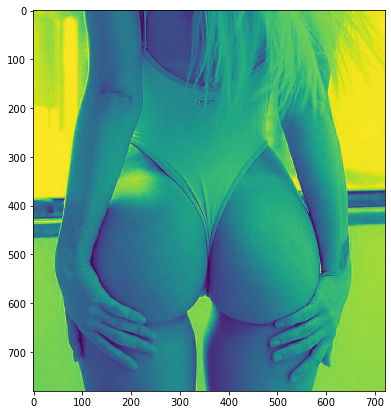

In [345]:
np_to_img(img)
img = img[:,:,None]

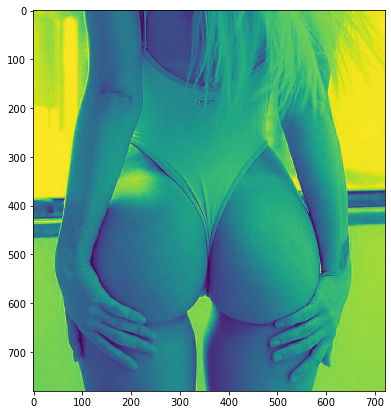

In [353]:
np_to_img(img)

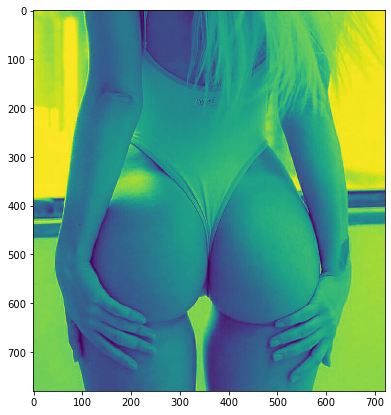

In [360]:
smoothed_img = compute_inverse_gradient(img, 9)
np_to_img(smoothed_img)